In [93]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [94]:
smoothing = 0.2
mass = 0.04

def kernel(q):
    sigma = 2.0/3.0

    # Third-order Schoenberg B-spline (M_4), as detailed in Price (2010) pg. 3.
    if (q < 1):
        w = 0.25 * np.power(2 - q, 3) - np.power(1 - q, 3)
        return sigma * w
    elif (q >= 1 and q < 2):
        w = 0.25 * np.power(2 - q, 3)
        return sigma * w
    else:
        # > 2
        return 0



In [95]:
def pd_read_dump(filepath):
    df = pd.read_csv(
        filepath, 
        sep="    ", comment="#",
        names = ["Particle ID", "Particle type", "Smoothing length", "Density", "Pressure", "Particle acceleration", "Particle velocity", "Particle position"],
        engine="python"
    )
    return df

,Particle ID,Particle type,Smoothing length,Density,Pressure,Particle acceleration,Particle velocity,Particle position
0,101,Alive,0.040,1.000,1.0,4624268.274,1.0,-1.00
1,102,Alive,0.040,1.000,1.0,-19.385,1.0,-0.98
2,103,Alive,0.040,1.000,1.0,-0.001,1.0,-0.96
3,104,Alive,0.040,1.000,1.0,1.898,1.0,-0.94
4,105,Alive,0.040,1.000,1.0,-19.940,1.0,-0.92
...,...,...,...,...,...,...,...,...
108,209,Ghost,0.046,0.871,0.0,0.000,1.0,1.10
109,210,Ghost,0.040,0.989,0.0,0.000,1.0,1.08
110,211,Ghost,0.040,1.000,0.0,0.000,1.0,1.06
111,212,Ghost,0.040,1.000,0.0,0.000,1.0,1.04


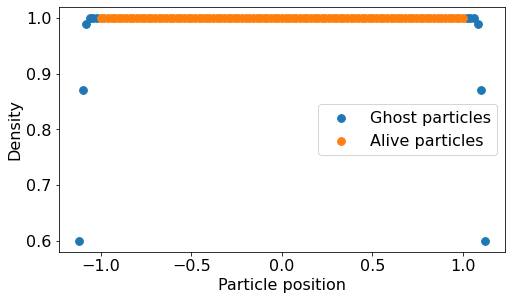

In [98]:
df_0 = pd_read_dump("../dumps/0.txt")

display(df_0)

n_part = len(df_0)

df_alive = df_0[df_0["Particle type"] == "Alive"]
df_ghost = df_0[df_0["Particle type"] == "Ghost"]

# Initial condition plot showing off ghost particles
plt.figure(figsize=(8, 4.5))
plt.rc("font", size=16)

plt.scatter(df_ghost["Particle position"], df_ghost["Density"], label="Ghost particles", s=60)
plt.scatter(df_alive["Particle position"], df_alive["Density"], label="Alive particles", s=60)

plt.xlabel("Particle position")
plt.ylabel("Density")
plt.legend()
plt.show()

,Particle ID,Particle type,Smoothing length,Density,Pressure,Particle acceleration,Particle velocity,Particle position
0,101,Alive,12.491,0.003,0.003,0.000,11561.671,11560.671
1,102,Alive,0.019,2.105,2.105,-0.307,0.319,-0.231
2,103,Alive,0.035,1.158,1.158,-0.465,0.816,-0.089
3,104,Alive,0.045,0.890,0.890,-1.148,0.812,-0.025
4,105,Alive,0.007,5.544,5.544,0.016,1.047,0.157
...,...,...,...,...,...,...,...,...
108,209,Ghost,0.046,0.871,0.000,0.000,1.000,1.100
109,210,Ghost,0.040,0.989,0.000,0.000,1.000,1.080
110,211,Ghost,0.040,1.000,0.000,0.000,1.000,1.060
111,212,Ghost,0.040,1.000,0.000,0.000,1.000,1.040


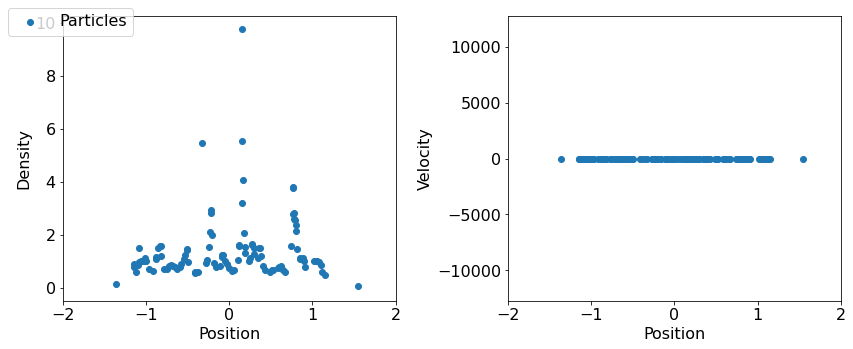

In [97]:
# Density plot at t = 1 for isothermal shock test

"""
fig, ax = plt.subplots(3, figsize=(8, 30), sharey=True)

end = 1
step = 0.005
files = int(np.floor(end/step + 1))
print(files)

j = 0
for i in np.arange(0, files, 100):
    current_ax = ax[j]
    df = pd_read_dump(f"{i}.txt")

    ax[j].scatter(df["Particle position"], df["Density"], label="Particles", zorder=100)

    fake_density_x = np.linspace(-1, 1, 100)
    fake_density_y = [density(x, df) for x in fake_density_x]
    ax[j].plot(fake_density_x, fake_density_y, label="Post-simulation density estimate", linestyle='dashed', linewidth=2.5, color="lightsteelblue")

    ax[j].set_title(f"T = {i*step}")
    ax[j].set_xlabel("Particle position")
    ax[j].set_ylabel("Density")
    j += 1
"""

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
df_1 = pd_read_dump(f"../dumps/200.txt")
display(df_1)


ax[0].scatter(df_1["Particle position"], df_1["Density"], label="Particles", zorder=100)
#fig.set_title("T = 1 isothermal colliding streams / h = 0.3, T_step = 0.005")
ax[0].set_xlabel("Position")
ax[0].set_ylabel("Density")
ax[0].set_xlim(-2, 2)

ax[1].scatter(df_1["Particle position"], df_1["Particle velocity"])
ax[1].set_xlabel("Position")
ax[1].set_ylabel("Velocity")
ax[1].set_xlim(-2, 2)

fig.legend(loc='upper left')
plt.tight_layout()
plt.show()
